In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv("spam.csv")
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [4]:
le=LabelEncoder()
data['Category']=le.fit_transform(data['Category'])
data

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

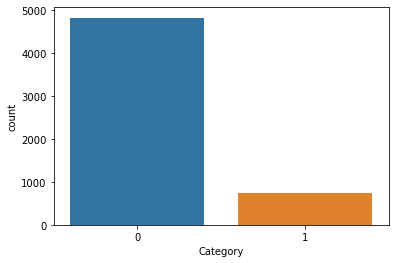

In [5]:
sns.countplot(data['Category'])

In [6]:
import nltk
from nltk import tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [7]:
stemmer=PorterStemmer()
for i in data['Message']:
    words=nltk.word_tokenize(i)
    for word in words:
        if word not in set(stopwords.words('english')):
            print(stemmer.stem(word))


go
jurong
point
,
crazi
..
avail
bugi
n
great
world
la
e
buffet
...
cine
got
amor
wat
...
ok
lar
...
joke
wif
u
oni
...
free
entri
2
wkli
comp
win
fa
cup
final
tkt
21st
may
2005
.
text
fa
87121
receiv
entri
question
(
std
txt
rate
)
t
&
c
's
appli
08452810075over18
's
u
dun
say
earli
hor
...
u
c
alreadi
say
...
nah
i
n't
think
goe
usf
,
live
around
though
freemsg
hey
darl
's
3
week
's
word
back
!
i
'd
like
fun
still
?
tb
ok
!
xxx
std
chg
send
,
£1.50
rcv
even
brother
like
speak
.
they
treat
like
aid
patent
.
as
per
request
'mell
mell
(
oru
minnaminungint
nurungu
vettam
)
'
set
callertun
caller
.
press
*
9
copi
friend
callertun
winner
!
!
as
valu
network
custom
select
receivea
£900
prize
reward
!
to
claim
call
09061701461
.
claim
code
kl341
.
valid
12
hour
.
had
mobil
11
month
?
u
r
entitl
updat
latest
colour
mobil
camera
free
!
call
the
mobil
updat
co
free
08002986030
i
'm
gon
na
home
soon
n't
want
talk
stuff
anymor
tonight
,
k
?
i
've
cri
enough
today
.
six
chanc
win
cash
!
from
100
2

In [8]:
x=data['Message']
y=data['Category']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
tfidf_vectorizer = TfidfVectorizer()

In [11]:
X_train= tfidf_vectorizer.fit_transform(X_train)
X_test= tfidf_vectorizer.transform(X_test)

In [12]:
svm_classifier = SVC()

In [13]:
svm_classifier.fit(X_train, y_train)

SVC()

In [14]:
y_pred = svm_classifier.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.989237668161435

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       1.00      0.92      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115

